In [1]:
%matplotlib inline
from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Automatically created module for IPython interactive environment


In [2]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]


In [9]:
lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

print(alphas)
print(alphas.shape)

[  1.00000000e-04   1.32035178e-04   1.74332882e-04   2.30180731e-04
   3.03919538e-04   4.01280703e-04   5.29831691e-04   6.99564216e-04
   9.23670857e-04   1.21957046e-03   1.61026203e-03   2.12611233e-03
   2.80721620e-03   3.70651291e-03   4.89390092e-03   6.46167079e-03
   8.53167852e-03   1.12648169e-02   1.48735211e-02   1.96382800e-02
   2.59294380e-02   3.42359796e-02   4.52035366e-02   5.96845700e-02
   7.88046282e-02   1.04049831e-01   1.37382380e-01   1.81393069e-01
   2.39502662e-01   3.16227766e-01]
(30,)


In [11]:
scores = list()
scores_std = list()

n_folds = 3

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_val_score(lasso, X, y, cv=n_folds, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

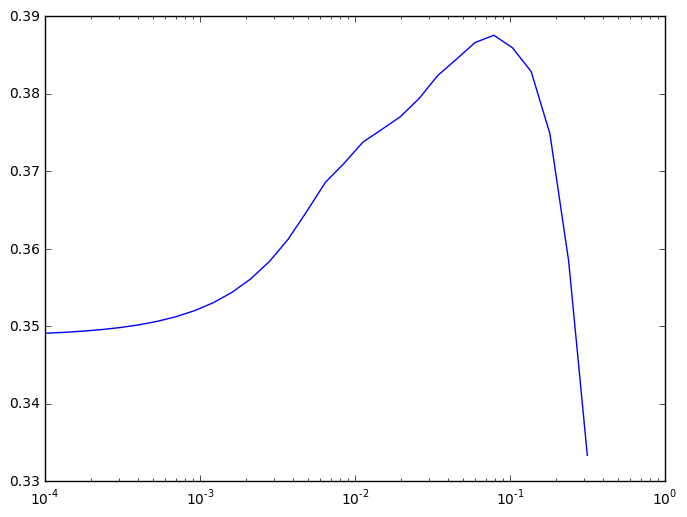

In [12]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

/Users/jason.xie/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


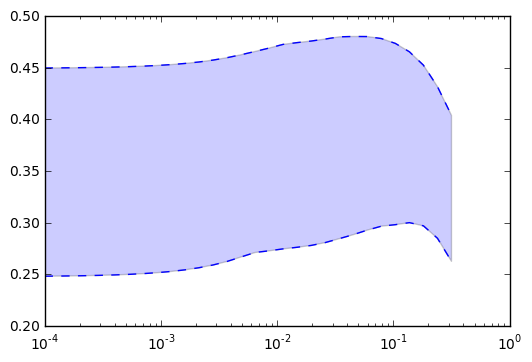

In [14]:
std_error = scores_std / np.sqrt(n_folds)
plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)


(0.0001, 0.31622776601683794)

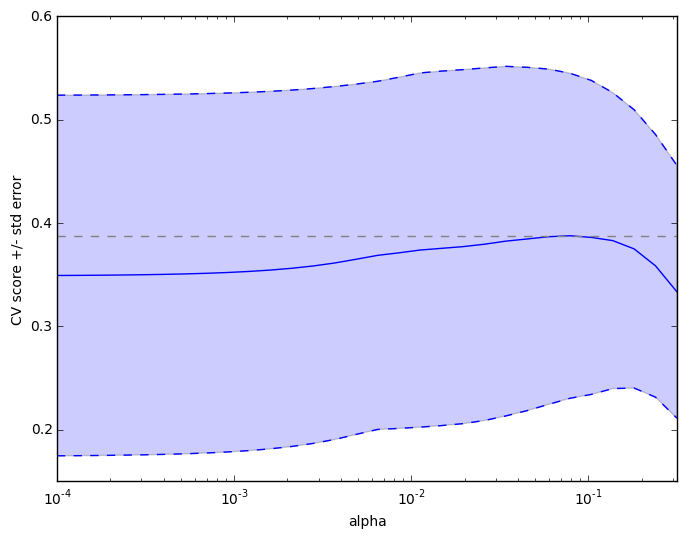

In [19]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
# std_error = scores_std / np.sqrt(n_folds)
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])